In [2]:
pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=ae789cc2124a94d8c4fab30ef37fbda0b6727efdb2f44e33d84badf88cce5e68
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


4가지 데이터

- forge: 이진분류
- wave: 회귀
- cancer: 이진분류
- boston: 회귀

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


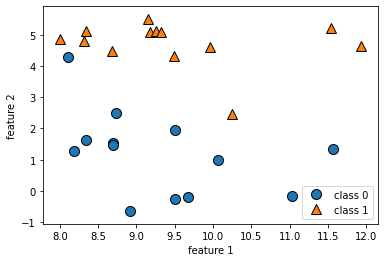

In [6]:
import matplotlib.pyplot as plt
import mglearn

X_forge, y_forge = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

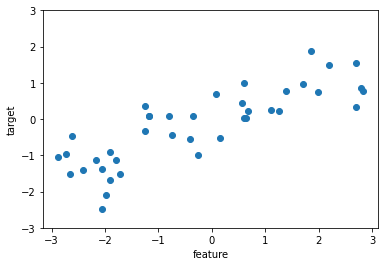

In [7]:
import matplotlib.pyplot as plt
import mglearn

X_wave, y_wave = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X_wave, y_wave, 'o')
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")
plt.show()

In [8]:
import numpy as np
from sklearn import datasets

cancer = datasets.load_breast_cancer()

In [10]:
from sklearn import datasets

boston = datasets.load_boston()

# kNN

분류

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


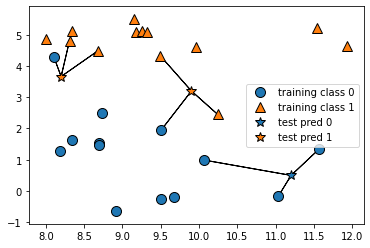

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import mglearn

X_forge, y_forge = mglearn.datasets.make_forge()

X_forge_train, X_forge_test, y_forge_train, y_forge_test = train_test_split(X_forge, y_forge, random_state=0)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_forge_train, y_forge_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
print(knn_clf.score(X_forge_test, y_forge_test))

0.8571428571428571


결정경계

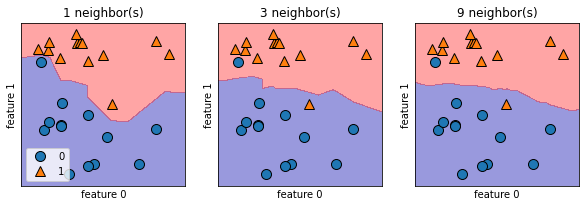

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_forge, y_forge)
    mglearn.plots.plot_2d_separator(clf, X_forge, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)
plt.show()


회귀

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import mglearn.datasets

X_wave, y_wave = mglearn.datasets.make_wave()

X_wave_train, X_wave_test, y_wave_train, y_wave_test = train_test_split(X_wave, y_wave, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_wave_train, y_wave_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

# 선형모델

선형 분류

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


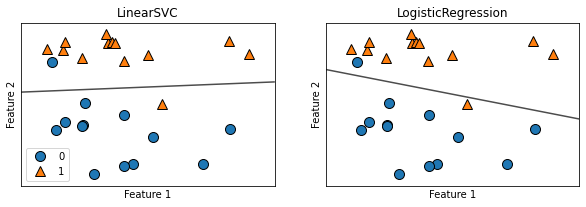

In [20]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import mglearn.datasets

X_forge, y_forge = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X_forge, y_forge)
    mglearn.plots.plot_2d_separator(clf, X_forge, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
axes[0].legend()
plt.show()


로지스틱 회귀

In [22]:
from sklearn.model_selection import train_test_split
import mglearn.datasets

X_forge, y_forge = mglearn.datasets.make_forge()

X_forge_train, X_forge_test, y_forge_train, y_forge_test = train_test_split(X_forge, y_forge, random_state=0)
clf = LogisticRegression()
clf.fit(X_forge_train, y_forge_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

선형회귀(MSE(최소제곱법))

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mglearn.datasets

X_wave, y_wave = mglearn.datasets.make_wave(n_samples=60)

X_wave_train, X_wave_test, y_wave_train, y_wave_test = train_test_split(X, y, random_state=42)
reg = LinearRegression()
reg.fit(X_wave_train, y_wave_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(reg.coef_)
print(reg.intercept_)

[0.47954524]
-0.09847983994403892


나이브 베이즈 분류기

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import mglearn.datasets

X_forge, y_forge = mglearn.datasets.make_forge()

X_forge_train, X_forge_test, y_forge_train, y_forge_test = train_test_split(X_forge, y_forge, random_state=0)
clf = GaussianNB()
clf.fit(X_forge_train, y_forge_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


GaussianNB(priors=None, var_smoothing=1e-09)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

cancer = datasets.load_breast_cancer()

X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_cancer_train, y_cancer_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [5]:
print(clf.score(X_cancer_test, y_cancer_test))

0.9370629370629371


In [7]:
from sklearn.tree import export_graphviz
import graphviz

dot = export_graphviz(clf, out_file=None, class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)
source = graphviz.Source(dot, engine='dot', format='png', filename="tree.dot")
source.render()

'tree.dot.png'

In [8]:
print(clf.feature_importances_)

[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]
